In [2]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wikipedia

from geopy.geocoders import Nominatim

import ipywidgets as widgets
from IPython.display import display

plt.rcParams.update({'font.size': 22})

In [3]:
df = pd.read_excel("../przydzielanie kryteriow.xls")

In [4]:
df.head()

,ptak_nr,id,kod_ostoi,nazwa_ostoi,nazwa_polska,nazwa_lacinska,status,liczba_par_min,liczba_par_max,dokladnosc_oszac,kryterium,rok,aktualne
0,34.0,3579,PL001,Delta Świny,bielaczek,Mergus albellus,NaN,815.0,1500.0,NaN,NaN,1995-2003,nie
1,36.0,3580,PL001,Delta Świny,nurogęś,Mergus merganser,M,5000.0,12000.0,NaN,NaN,1995-1997,nie
2,71.0,3581,PL001,Delta Świny,bielik,Haliaeetus albicilla,L,5.0,6.0,NaN,"C1,C6",1990-2003,nie
3,57.0,3583,PL001,Delta Świny,bąk,Botaurus stellaris,L,3.0,7.0,NaN,NaN,1995-2003,nie
4,58.0,3584,PL001,Delta Świny,bączek,Ixobrychus minutus,L,0.0,3.0,NaN,NaN,1995-2003,tak


In [5]:
df.keys()

Index(['ptak_nr', 'id', 'kod_ostoi', 'nazwa_ostoi', 'nazwa_polska',
       'nazwa_lacinska', 'status', 'liczba_par_min', 'liczba_par_max',
       'dokladnosc_oszac', 'kryterium', 'rok', 'aktualne'],
      dtype='object')

# First, EDA

<Axes: >

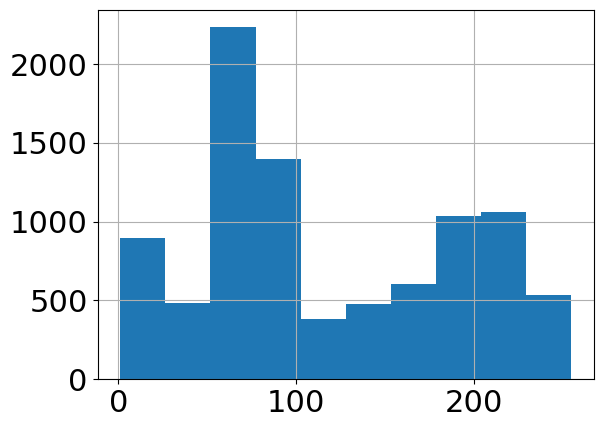

In [6]:
df['ptak_nr'].hist()

<Axes: >

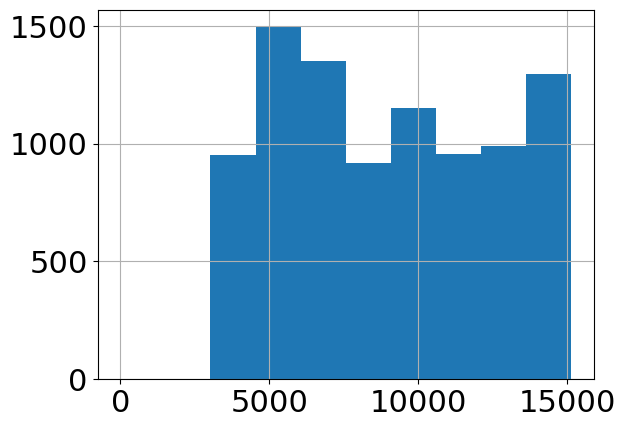

In [7]:
df['id'].hist()

In [11]:
df['status'].unique()

array([nan, 'M', 'L', 'P/Z', 'Z', 'L?', 'L/P'], dtype=object)

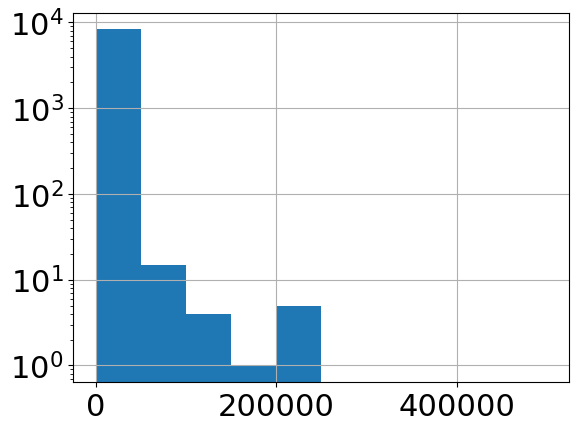

In [19]:
fig, ax = plt.subplots()
df['liczba_par_min'].hist(ax=ax, range=(0,500000))
ax.set_yscale('log')

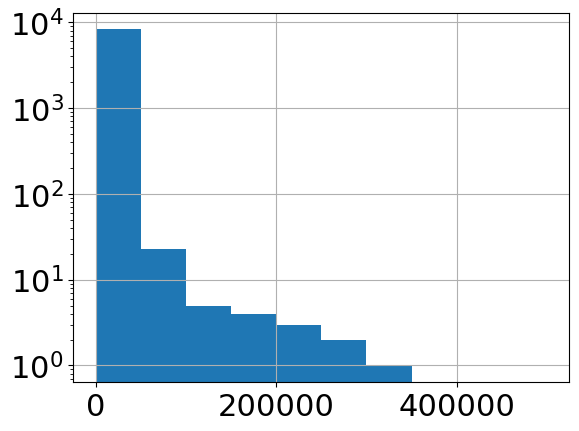

In [20]:
fig, ax = plt.subplots()
df['liczba_par_max'].hist(ax=ax, range=(0,500000))
ax.set_yscale('log')

In [7]:
df['liczba_par_min'].max()

837000.0

# Ostoje

In [11]:
ostoje_array = df['nazwa_ostoi'].unique()
wikipedia.set_lang("pl")

In [12]:
for ostoja in ostoje_array:
    print(ostoja, end="\t")
    try:
        p = wikipedia.page(ostoja)
        print(p.coordinates)
    except:
        print("Nie znaleziono współrzednych")

Delta Świny	(Decimal('53.86666699999999963210939313285052776336669921875'), Decimal('14.3583330000000000126192389870993793010711669921875'))
Zalew Szczeciński	(Decimal('53.783332999999998946805135346949100494384765625'), Decimal('14.333332999999999657347871107049286365509033203125'))
Puszcza Wkrzańska	(Decimal('53.62694400000000172212821780703961849212646484375'), Decimal('14.355833000000000509999154019169509410858154296875'))
Ostoja Świdwie	Nie znaleziono współrzednych
Dolina Dolnej Odry	Nie znaleziono współrzednych
Jeziora Wełtyńskie	Nie znaleziono współrzednych
Ostoja Miedwie	Nie znaleziono współrzednych
Ostoja Cedyńska	Nie znaleziono współrzednych
Puszcza Goleniowska	Nie znaleziono współrzednych
Bagna Rozwarowskie	Nie znaleziono współrzednych
Zalew Kamieński i Dziwna	(Decimal('53.9902780000000035443008528091013431549072265625'), Decimal('14.748611000000000359477780875749886035919189453125'))
Ostoja Trzebiatowska	Nie znaleziono współrzednych
Ostoja Witnicko-Dębniańska	(Decimal('52.7

C:\Users\pawel.gliwny.FIS\AppData\Local\miniconda3\envs\geo\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\pawel.gliwny.FIS\AppData\Local\miniconda3\envs\geo\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Nie znaleziono współrzednych
Lasy Skaliskie	Nie znaleziono współrzednych
Puszcza Borecka	(Decimal('54.13388499999999936562744551338255405426025390625'), Decimal('22.09420000000000072759576141834259033203125'))
Puszcza Napiwodzko-Ramucka	Nie znaleziono współrzednych
Puszcza Piska	(Decimal('53.667113999999997986378730274736881256103515625'), Decimal('21.44564199999999942747308523394167423248291015625'))
Jezioro Łuknajno	(Decimal('53.81666700000000247428033617325127124786376953125'), Decimal('21.63333300000000036789060686714947223663330078125'))
Ostoja Poligon Orzysz	(Decimal('53.611389000000002624801709316670894622802734375'), Decimal('22.063055999999999556848706561140716075897216796875'))
Bagna Nietlickie	(Decimal('53.88166700000000020054358174093067646026611328125'), Decimal('21.80111099999999879628376220352947711944580078125'))
Puszcza Augustowska	(Decimal('53.9093110000000024228938855230808258056640625'), Decimal('23.228207999999998634166331612505018711090087890625'))
Dolina Biebrzy	

In [10]:
df_bielik = df[df['nazwa_polska'] == "bielik"]

In [11]:
df_bielik[df_bielik['dokladnosc_oszac'] == "dokładne liczenie"]["rok"].unique()

array(['2004-2009', '2005-2007', '2004-2008', '2002-2008', '2005-2009',
       '2007-2008', '2007-2009', '1995-2008', '2008', '1997-2003',
       '1995-2003', '2008-2009', '2009', '1996-2003', '2001-2004, 2008',
       '2001-2004, 2009', '2003-2009', '2006-2009', '2000-2003',
       '2001-2002', '2005-2008', '1999-2003', '2006', '2007', '1998-2009',
       '2003-2007', '2004-2005', '2002-2009', '2006-2007', '2000-2009',
       '2004-2006'], dtype=object)

In [12]:
def get_df_ptak(nazwa_ptaka, nazwa_ostoi):
    df_ptak = df[(df['nazwa_polska'] == nazwa_ptaka) & (df['dokladnosc_oszac'] == "dokładne liczenie")]
    df_ptak = df_ptak[df['nazwa_ostoi'] == nazwa_ostoi]
    return df_ptak

In [13]:
df_bielik = get_df_ptak("bielik", "Puszcza Borecka")

C:\Users\pawel.gliwny.FIS\AppData\Local\Temp\ipykernel_6696\2011041227.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ptak = df_ptak[df['nazwa_ostoi'] == nazwa_ostoi]


In [14]:
df_bielik[df_bielik['dokladnosc_oszac'] == "dokładne liczenie"]["nazwa_ostoi"].unique()

array(['Puszcza Borecka'], dtype=object)

In [15]:
df_nuroges = df[df['nazwa_polska'] == "nurogęś"]

In [16]:
df_nuroges.head()

,ptak_nr,id,kod_ostoi,nazwa_ostoi,nazwa_polska,nazwa_lacinska,status,liczba_par_min,liczba_par_max,dokladnosc_oszac,kryterium,rok,aktualne
1,36.0,3580,PL001,Delta Świny,nurogęś,Mergus merganser,M,5000.0,12000.0,NaN,NaN,1995-1997,nie
60,36.0,12210,PL001,Delta Świny,nurogęś,Mergus merganser,P/Z,5000.0,14000.0,przybliżony szacunek,NaN,2004-2009,tak
104,36.0,3628,PL002,Zalew Szczeciński,nurogęś,Mergus merganser,M,10000.0,50000.0,NaN,"C3,C4",1997-1999,nie
163,36.0,12418,PL002,Zalew Szczeciński,nurogęś,Mergus merganser,M,30000.0,50000.0,przybliżony szacunek,NaN,2004-2009,tak
164,36.0,12419,PL002,Zalew Szczeciński,nurogęś,Mergus merganser,Z,30000.0,30000.0,dokładne liczenie,NaN,2004-2009,tak


In [55]:
df = pd.DataFrame([
    ['apple', 4],
    ['apple', 4.5],
    ['orange', 5],
    ['pear', 6],
], columns=['fruit', 'price'])

In [56]:
def view1(fruit):
    display(df[df['fruit']==fruit])

fruitSelect = widgets.Select(options=['apple', 'orange' ,'pear'])
widgets.interactive(view1, fruit=fruitSelect)

interactive(children=(Select(description='fruit', options=('apple', 'orange', 'pear'), value='apple'), Output(…

In [57]:
def view_ptak(rok):
    display(df_nuroges[df_nuroges['rok'] == rok])

rokSelect = widgets.Select(options=['1995-1997', '1997-1999', '2004-2009'])
widgets.interactive(view_ptak, rok=rokSelect)

interactive(children=(Select(description='rok', options=('1995-1997', '1997-1999', '2004-2009'), value='1995-1…